# Часть 1. Арифметические операции с изображениями

In [1]:
%matplotlib inline
from skimage.io import imread, imsave, imshow
img = imread('tiger-color.png')

In [2]:
img.dtype #uint-8 --> информация хранится в диапазоне от 0 до 255 (1 пиксель = 1 байт)

dtype('uint8')

Информация в таком диапазоне ограничена, мы не можем применить к ней арифметические операции.       
Поэтому применим функцию img_as_float.

In [3]:
from skimage import img_as_float

In [5]:
img_f = img_as_float(img) # Принимает на вход изображение, которое нужно преобразовать к вещественным числам

In [9]:
# Посмотрим на диапазон значений, которое принимают числа в одном и в другом изображениях
print('В целых числах: ', img.min(), img.max()) 
print('В вещественных числах: ', img_f.min(), img_f.max())

# После перевода в вещественные числа можно применять к изображению арифм. операции.

В целых числах:  0 255
В вещественных числах:  0.0 1.0


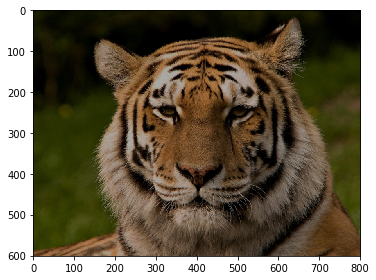

In [10]:
# Деление
# Попробуем разделить изображение на 1.5
imshow(img_f/1.5)

Изображение тигра стало бледнее, потому что цветов стало меньше

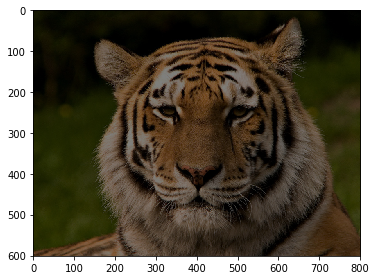

In [12]:
# Поделим теперь все значения на 2:
imshow(img_f/2)

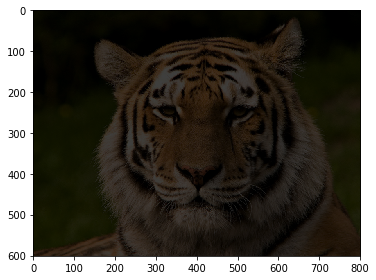

In [13]:
# Поделим теперь все значения на 4:
imshow(img_f/4)

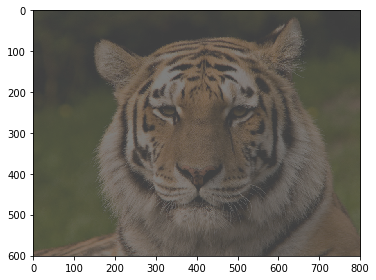

In [14]:
# Прибавим к последним изображению одну четвертую
imshow(img_f/4 + 0.25)
# Изображение стало более приближено к белому цвету

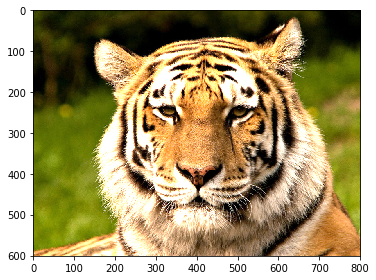

In [19]:
from numpy import clip # функция принимает два аргумента: нижний и верхний пороги
# Все значения в изображении, которые ниже нижнего порога - эта функция делает равными нижнему порогу.
# А все значения, которые больше верхнего порога - эта функция делает равными верхнему порогу.
# Теперь можем поэкспериментировать с умножением изображения на число.

imshow(clip(img_f * 1.5, 0, 1)) # обрежем от 0 до 1
# Контрастность тигра повысилась

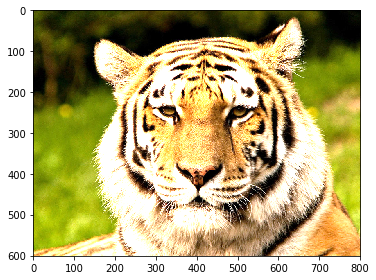

In [20]:
# Попробуем домножить изображение на 2
imshow(clip(img_f * 2, 0, 1)) # обрежем от 0 до 1
# Тигр стал еще контрастнее, цвета стали еще более далекими друг от друга

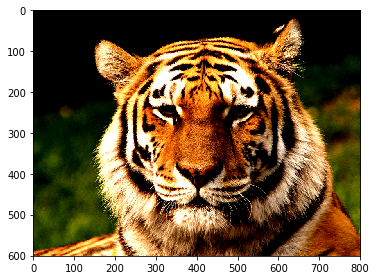

In [22]:
# Посмотрим, как работает вычитание
imshow(clip(img_f * 2 - 0.5, 0, 1)) # обрежем от 0 до 1
# Тигр остался контрастным, но цвета стали темнее.
# Выходит, при вычитании 0,5 все цвета приближаем к чёрному.

# Часть 2. Каналы. Вычисление яркости изображения

In [25]:
from skimage import img_as_float

In [26]:
img_f = img_as_float(img)

In [27]:
# Посмотрим на красный канал. 0 - значит красный канал.
r = img_f[:, :, 0] # взять все строки и все столбцы в изображении

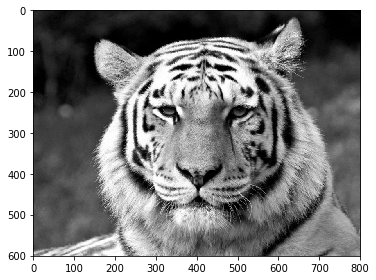

In [29]:
imshow(r)

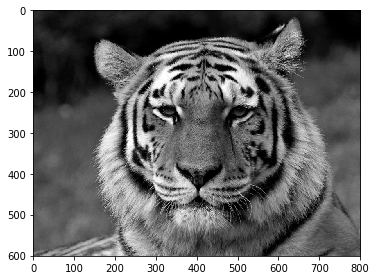

In [31]:
# 1 - значит зеленый канал.
g = img_f[:, :, 1] 
imshow(g)

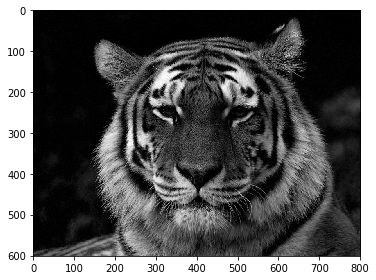

In [32]:
# 2 - значит синий канал.
b = img_f[:, :, 2] 
imshow(b)

# Картинка темнее, значит, синего в ней немного

Составим цветное изображение по трём каналам.

In [33]:
from numpy import dstack

In [34]:
img_combined = dstack((r, g, b))

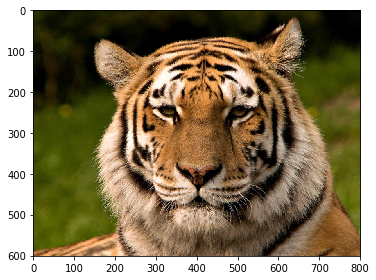

In [35]:
imshow(img_combined)

Усредним 3 канала --> получим серое изображение по трем каналам

In [36]:
avg_gray = (r + g + b)/3 # суммировали значения попиксельно, а потом разделили всё на одно и то же число

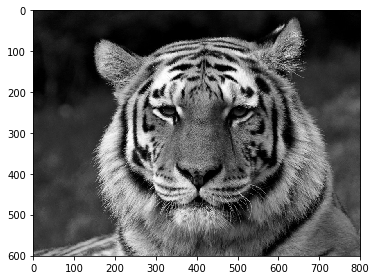

In [37]:
imshow(avg_gray)